# Exploring data

In [1]:
#| default_exp nb_02_exploring

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| export
from ml.nb_01_processing import *

In [1]:
#| export
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_pickle("data/df_all_2022_10_06.pkl")
df.shape

(1180, 95)

In [3]:
#from PIL import Image

In [4]:
imgx_fn = df.fn_x[0]
imgy_fn = df.fn_y[0]

In [5]:
from fastai.vision.all import *

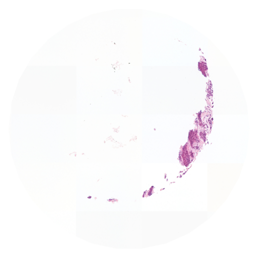

In [6]:
imgx = Image.open(imgx_fn)
imgx.to_thumb(256,256)

In [7]:
imgy = Image.open(imgy_fn)
#imgy.to_thumb(256,256)

## Data block

In [8]:
fnames = get_image_files(Path("/media/dimi/TOSHIBA EXT/Dimitrij Original Images"))

In [9]:
fnames[:10]

(#10) [Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/12-E.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/5-A.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-A.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-B.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-C.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-D.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-E.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-F.tif'),Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-G.tif')]

In [10]:
df.columns

Index(['TMA_ID', 'TMASpot', 'fn_x', 'fn_y', 'Relevanz', 'AlternativeBelegung',
       'PatID', 'EDatum', 'Alter', 'G', 'T', 'grTumordurchmesser',
       'weitereTumordurchmesser', 'N', 'ER', 'PR', 'Her2neu', 'Her2neuScore',
       'Ki67', 'Ki67_percent', 'DegreeOfTubuleFormation',
       'NuclearPleomorphism', 'Mitosis', 'VanNuys', 'WHO', 'WHO_DCIS',
       'Tumorart', 'Probenart', 'Seite', 'Status', 'letzteEE', 'EE2', 'EE3',
       'Tod_Quelle', 'Tod_Datum', 'Rezidiv_jn', 'Metastase_jn',
       'Rezidivdatum_2011', 'Rezidivdatum2011_2', 'Rezidivdatum_2015',
       'Rezidivdatum_2020', 'Metastase_Lokalisation', 'AB_Massnahme',
       'AB_Radiatio', 'Radiatio_jn', 'AB_zytotox_Medikament',
       'AB_zytotox_Zyklen', 'AB_zytotox_Abbruch', 'Chemo_jn',
       'Chemo_Zeitpunkt', 'Chemo_Medikament', 'AB_endokr_Dauer',
       'AB_endokr_Medikament', 'AB_endokr_Abbruch', 'Antihormon_jn',
       'Tamoxifen_2020', 'Antihormon_2015', 'Tamoxifen_2015', 'Tamoxifen_2014',
       'Tamoxifen_Exprimage

In [31]:
def label_func(fname):
    return df["event_dom"][df["fn_x"]==fname].values[0] 

In [41]:
def image_func():
    return df["fn_x"]

In [11]:
dblock = DataBlock(
  blocks=(ImageBlock, CategoryBlock),      # one image input and 2 categorical targets
  getters=[ColReader('fn_x'),   # image input
           ColReader('event_dom')],                     # label 
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256)
)                                                  
dls = dblock.dataloaders(df, bs=64)   # Create the dataloaders
dls.n_inp = 1                         # Set the number of inputs

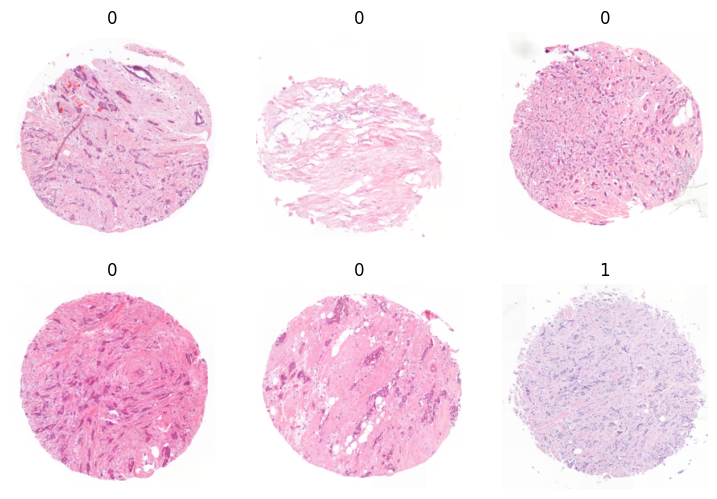

In [12]:
dls.show_batch(max_n=6)

In [14]:
bacc = BalancedAccuracy()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=bacc)
learn.fine_tune(1)

/home/dimi/anaconda3/envs/niendorf/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/dimi/anaconda3/envs/niendorf/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,balanced_accuracy_score,time
0,1.205924,0.704165,0.432440,41:14


epoch,train_loss,valid_loss,balanced_accuracy_score,time


In [58]:
import torch

In [59]:
torch.cuda.device(0)

In [60]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1070 Ti'